# Exploratory Data Analysis

Let's take a look at the data!

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from functions import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Load images from local folders

In [2]:
# Filepaths
train_dir = 'input_images/train'

train_open_dir = os.path.join(train_dir, 'open_bike_lane')
train_vehicle_dir = os.path.join(train_dir, 'vehicle_bike_lane')

train_open_dir

'input_images/train/open_bike_lane'

In [3]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

In [4]:
# Check functionality and number of images
print('There are', len(os.listdir(train_open_dir)), 'non-target images in the training set')
print('There are', len(os.listdir(train_vehicle_dir)), 'target images in the training set')

# Expecting:
# 625 non-target
# 636 target

There are 625 non-target images in the training set
There are 636 target images in the training set


## EDA: Image Samples and Metadata

Using `get_images` function defined in `functions.py`

In [8]:
# Get training images of both classes
# Read files in as images
train_open_images = get_images(train_open_dir, num_images=5)
train_vehicle_images = get_images(train_vehicle_dir, num_images=5)

Display 5 images from each set:

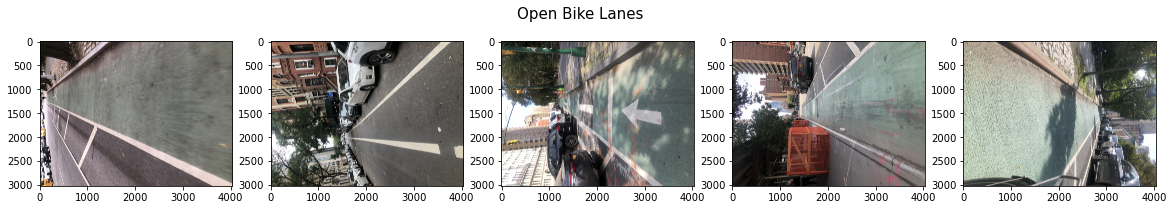

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.imshow(train_open_images[i])
fig.suptitle('Open Bike Lanes', fontsize=15, y=.8)
fig.tight_layout;

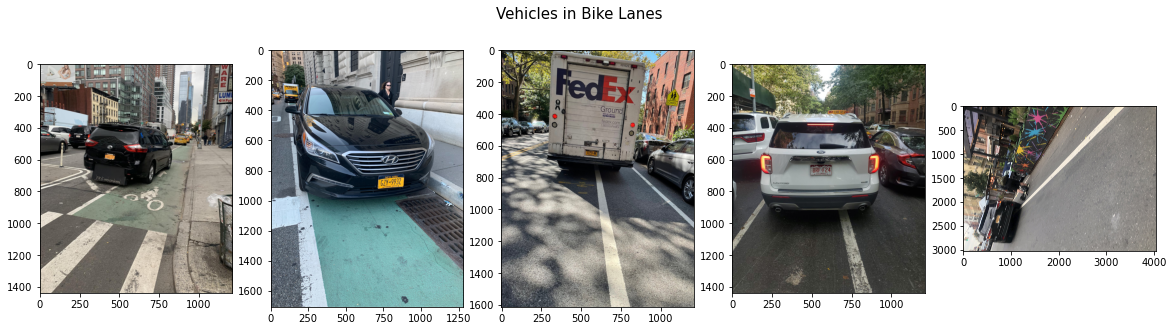

In [15]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.imshow(train_vehicle_images[i])
fig.suptitle('Vehicles in Bike Lanes', fontsize=15)
fig.tight_layout;

Why are some images printing out rotated 90 degrees? I'm assuming this is a problem in the image files themselves, which could be a major issue when training my model! I want to make sure they're all oriented correctly, as the photos were taken.

Trying code from https://jdhao.github.io/2019/07/31/image_rotation_exif_info/ to see image EXIF data

ExifVersion: b'0232'
ComponentsConfiguration: b'\x01\x02\x03\x00'
ShutterSpeedValue: 6.909547598448271
DateTimeOriginal: 2021:10:12 15:01:19
DateTimeDigitized: 2021:10:12 15:01:19
ApertureValue: 1.6959938128383605
BrightnessValue: 5.793334716172302
ExposureBiasValue: 0.0
MeteringMode: 5
Flash: 16
FocalLength: 4.0
ColorSpace: 65535
ExifImageWidth: 4032
FocalLengthIn35mmFilm: 28
SceneCaptureType: 0
Make: Apple
36880 -04:00
36881 -04:00
36882 -04:00
SubsecTimeOriginal: 408
SubjectLocation: (2015, 1511, 2217, 1330)
SubsecTimeDigitized: 408
ExifImageHeight: 3024
SensingMethod: 2
Model: iPhone X
Orientation: 6
ExposureTime: 0.008333333333333333
XResolution: 72.0
YCbCrPositioning: 1
FNumber: 1.8
SceneType: b'\x01'
YResolution: 72.0
ExposureProgram: 2
ISOSpeedRatings: 32
ResolutionUnit: 2
ExposureMode: 0
FlashPixVersion: b'0100'
WhiteBalance: 0
Software: 15.0.1
LensSpecification: (4.0, 6.0, 1.8, 2.4)
LensMake: Apple
LensModel: iPhone X back dual camera 4mm f/1.8
DateTime: 2021:10:12 15:01:19
E

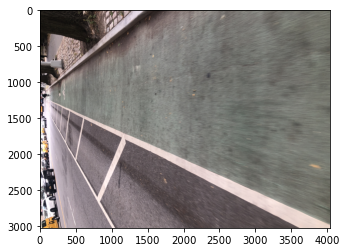

In [19]:
from PIL import Image
from PIL.ExifTags import TAGS

# List of filenames
filenames = os.listdir(train_open_dir)
# Get the full filepath to the first image
filepath = os.path.join(train_open_dir, filenames[0])
test_img = Image.open(filepath)
plt.imshow(test_img)


exif = test_img.getexif()

for k, v in exif.items():
    try:
        print('{}: {}'.format(TAGS[k], v))
    except:
        print(k, v)

Note the `'Orientation: 6'` key-value pair! Pretty sure this is the orientation of the photo.

Orientation:  3


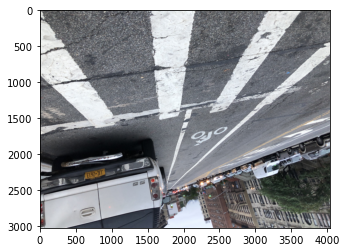

In [46]:
# Get the full filepath to the another image
filepath = os.path.join(train_open_dir, filenames[6])
test_img = Image.open(filepath)
plt.imshow(test_img)


exif = test_img.getexif()

print('Orientation: ', dict(exif.items())[274])